In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker = "AAPL"

# Get the start and end dates 
start = '2010-01-01'
end = '2019-12-31'

# Fetch stock data from Yahoo Finance using the user-defined start and end dates
stock_data = yf.download(ticker, start=start, end=end)

# Convert the fetched data into a pandas DataFrame
df = pd.DataFrame(stock_data)

# Print the resulting DataFrame
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409360,447610800
...,...,...,...,...,...,...
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082321,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.147980,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519928,93121200


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409360,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.082321,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.147980,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.519928,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.493141,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.911545,144114400


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481930,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409360,447610800


In [6]:
df = df.drop(["Date","Adj Close"], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


In [7]:
import plotly.express as px

fig = px.line(df.Close)
fig.show()


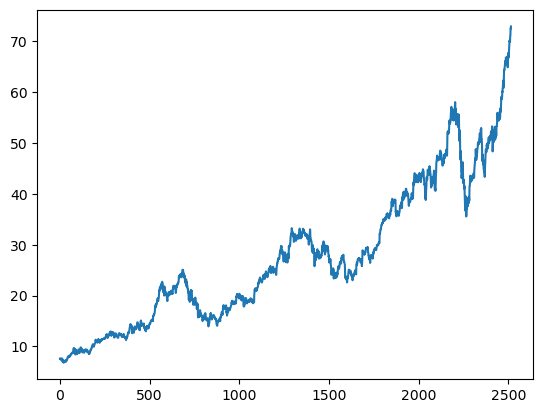

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

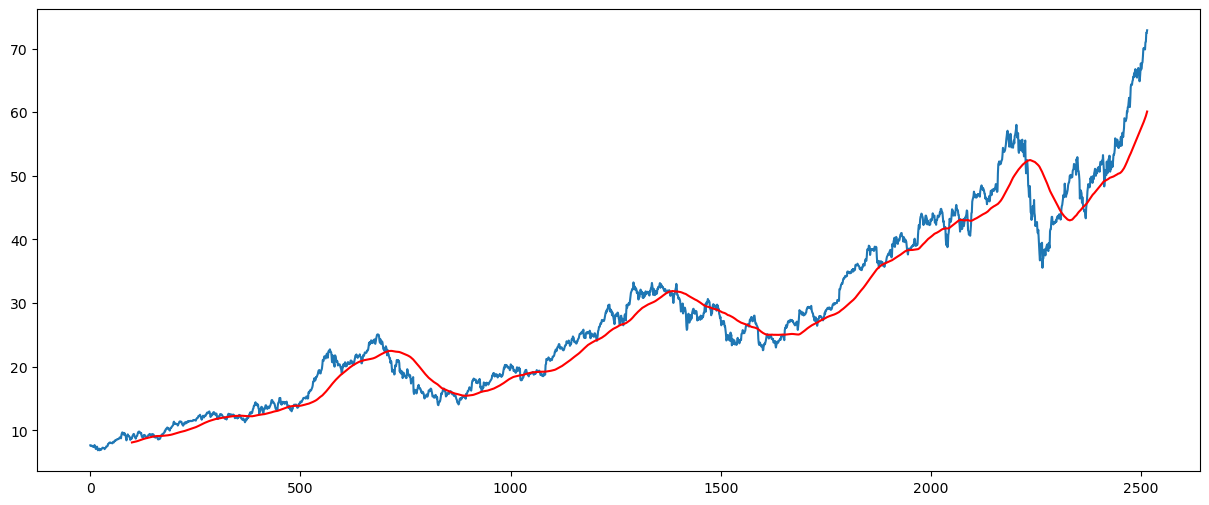

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df.Close)
plt.plot(ma100, "r")

In [12]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Closing Price'))
fig.add_trace(go.Scatter(x=df.index, y=ma100, name='100 Moving Average'))

fig.update_layout(
    title='Price Variations',
    xaxis_title='Index',
    yaxis_title='Price',
    width=1300,  # set the width of the figure
    height=900  # set the height of the figure
)

fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')))

fig.show()


In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df.Close, name='Closing Price'))
fig.add_trace(go.Scatter(x=df.index, y=ma100, name='100 Moving Average'))
fig.add_trace(go.Scatter(x=df.index, y=ma200, name='200 Moving Average'))

fig.update_layout(
    title='Price Variations',
    xaxis_title='Index',
    yaxis_title='Price',
    width=1300,  # set the width of the figure
    height=900  # set the height of the figure
)

fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')))

fig.show()

In [15]:
df.shape

(2515, 5)

In [16]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df["Close"][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df["Close"][int(len(df)*0.70) : int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [17]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
# Forming Time Series

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)   

In [21]:
print(x_train.shape)
print(y_train.shape)

(1660, 100, 1)
(1660,)


In [22]:
a = pd.DataFrame(x_train[:,:,0])
a

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.029718,0.030219,0.025604,0.025076,0.026971,0.024440,0.021206,0.025171,0.023520,0.018783,...,0.089735,0.083592,0.084133,0.081616,0.076176,0.061858,0.068029,0.074037,0.071953,0.070451
1,0.030219,0.025604,0.025076,0.026971,0.024440,0.021206,0.025171,0.023520,0.018783,0.031112,...,0.083592,0.084133,0.081616,0.076176,0.061858,0.068029,0.074037,0.071953,0.070451,0.082956
2,0.025604,0.025076,0.026971,0.024440,0.021206,0.025171,0.023520,0.018783,0.031112,0.026632,...,0.084133,0.081616,0.076176,0.061858,0.068029,0.074037,0.071953,0.070451,0.082956,0.087733
3,0.025076,0.026971,0.024440,0.021206,0.025171,0.023520,0.018783,0.031112,0.026632,0.021679,...,0.081616,0.076176,0.061858,0.068029,0.074037,0.071953,0.070451,0.082956,0.087733,0.093078
4,0.026971,0.024440,0.021206,0.025171,0.023520,0.018783,0.031112,0.026632,0.021679,0.007714,...,0.076176,0.061858,0.068029,0.074037,0.071953,0.070451,0.082956,0.087733,0.093078,0.097300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1655,0.744705,0.729833,0.742242,0.743000,0.758252,0.766682,0.770851,0.763177,0.762514,0.764883,...,0.791880,0.802206,0.819541,0.813384,0.831288,0.831288,0.837256,0.838677,0.845023,0.847960
1656,0.729833,0.742242,0.743000,0.758252,0.766682,0.770851,0.763177,0.762514,0.764883,0.777197,...,0.802206,0.819541,0.813384,0.831288,0.831288,0.837256,0.838677,0.845023,0.847960,0.849002
1657,0.742242,0.743000,0.758252,0.766682,0.770851,0.763177,0.762514,0.764883,0.777197,0.776250,...,0.819541,0.813384,0.831288,0.831288,0.837256,0.838677,0.845023,0.847960,0.849002,0.841708
1658,0.743000,0.758252,0.766682,0.770851,0.763177,0.762514,0.764883,0.777197,0.776250,0.774734,...,0.813384,0.831288,0.831288,0.837256,0.838677,0.845023,0.847960,0.849002,0.841708,0.843887


In [23]:
b = pd.DataFrame(y_train)
b

,0
0,0.082956
1,0.087733
2,0.093078
3,0.097300
4,0.096177
...,...
1655,0.849002
1656,0.841708
1657,0.843887
1658,0.850897


In [24]:
# ML MODEL

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [25]:
# model = Sequential()
# model.add(LSTM(units = 50, activation='relu', return_sequences=True,
#                input_shape = (x_train.shape[1],1)))
# model.add(Dropout(0.2))


# model.add(LSTM(units = 60, activation='relu',return_sequences=True))
# model.add(Dropout(0.3))


# model.add(LSTM(units = 80, activation='relu',return_sequences=True))
# model.add(Dropout(0.4))


# model.add(LSTM(units = 120, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units = 1))



In [26]:
# model.summary()

In [27]:
# model.compile(optimizer='adam', loss = 'mean_squared_error')
# model.fit(x_train, y_train, epochs=50)

In [28]:
# model.save('keras_model.h5')
from keras.models import load_model

model = load_model('keras_model.h5')


In [29]:
# For Prediction of Time Series

data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [30]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [31]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [33]:
input_data.shape

(855, 1)

In [34]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)   

print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [35]:
# Making Predictions

y_predicted = model.predict(x_test)
y_predicted.shape

24/24 [==============================] - 2s 41ms/step


(755, 1)

In [36]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [37]:
y_predicted

array([[0.16906221],
       [0.17017773],
       [0.17118204],
       [0.17204922],
       [0.17276634],
       [0.17333956],
       [0.17380391],
       [0.17421511],
       [0.17462483],
       [0.17507753],
       [0.17559361],
       [0.17617087],
       [0.17680822],
       [0.17750002],
       [0.17823073],
       [0.17898302],
       [0.17974   ],
       [0.18048362],
       [0.18122496],
       [0.18198134],
       [0.18276298],
       [0.18356615],
       [0.18437427],
       [0.18528001],
       [0.18638137],
       [0.18774521],
       [0.18941538],
       [0.19141681],
       [0.19374654],
       [0.19637421],
       [0.19923824],
       [0.20227836],
       [0.20545857],
       [0.20874938],
       [0.21211064],
       [0.215458  ],
       [0.21876909],
       [0.2220287 ],
       [0.22520724],
       [0.2282718 ],
       [0.23119429],
       [0.23395151],
       [0.23655997],
       [0.23902313],
       [0.2413668 ],
       [0.24359958],
       [0.24572064],
       [0.247

In [38]:
scaler.scale_

array([0.02123255])

In [39]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=np.array(range(1,len(y_test)+1)), y=y_test, name='Test Closing Price'))
fig.add_trace(go.Scatter(x=np.array(range(1,len(y_test)+1)), y=y_predicted[:,0], name='Predicted Closing Price'))

fig.update_layout(
    title='Price Variations',
    xaxis_title='Index',
    yaxis_title='Price',
    width=1300,  # set the width of the figure
    height=900  # set the height of the figure
)

fig.update_traces(marker=dict(size=8, line=dict(width=2, color='DarkSlateGrey')))

fig.show()

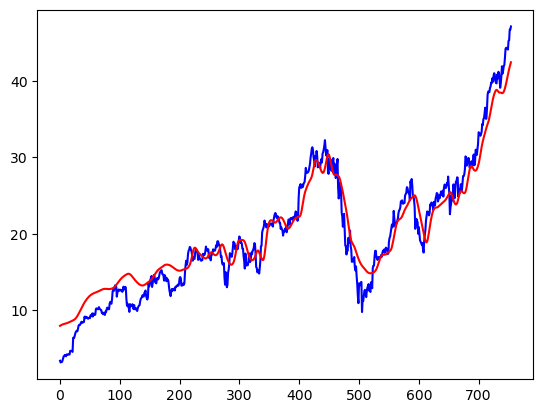

In [41]:
plt.plot(y_test,'b')
plt.plot(y_predicted,'r')

In [42]:
y_test[700]

33.270002365112305

In [43]:
y_predicted[700,0]

29.15112

In [45]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2 = r2_score(y_test, y_predicted)

# Display R2 score
print('Model Evaluation(R2 Score)')
print(f'R2 Score: {r2}')


Model Evaluation(R2 Score)
R2 Score: 0.9315487836209149
